# Generate meta-data and wordclouds for all companies 

In [1]:
import Preprocessing

companies = Preprocessing.execute("SELECT searchterm FROM tweet GROUP BY searchterm;")
companies = list(map(lambda x: x[0][1:], companies))
companies

['Adobe',
 'airliquidegroup',
 'Alstom',
 'ArcelorMittal',
 'Capgemini',
 'Cisco',
 'ENGIEgroup',
 'Forrester',
 'Generalelectric',
 'Intel',
 'MaerskLine',
 'Oracle',
 'orexad',
 'orexad_FR',
 'PublicisGroupe',
 'Rexel_Group',
 'SAFRAN',
 'Salesforce',
 'SolvayGroup',
 'TechnipGroup',
 'VMware',
 'VolvoTrucksFR']

### Preprocess tweets
time-consuming, see Preprocessing.py

In [2]:
data = []
for name in companies:
    %time data.append( Preprocessing.preprocessing( name, "en" ) )

CPU times: user 12min 45s, sys: 3.73 s, total: 12min 49s
Wall time: 13min 13s
CPU times: user 2min 12s, sys: 480 ms, total: 2min 13s
Wall time: 2min 13s
CPU times: user 1min 30s, sys: 348 ms, total: 1min 31s
Wall time: 1min 32s
CPU times: user 1min 34s, sys: 304 ms, total: 1min 34s
Wall time: 1min 35s
CPU times: user 9min 33s, sys: 2.2 s, total: 9min 35s
Wall time: 9min 35s
CPU times: user 11min 26s, sys: 3.38 s, total: 11min 29s
Wall time: 11min 34s
CPU times: user 3min 31s, sys: 816 ms, total: 3min 32s
Wall time: 3min 33s
CPU times: user 11min 56s, sys: 3.16 s, total: 11min 59s
Wall time: 12min
CPU times: user 7min 24s, sys: 1.83 s, total: 7min 26s
Wall time: 7min 26s
CPU times: user 30min, sys: 7.74 s, total: 30min 8s
Wall time: 30min 12s
CPU times: user 2min 5s, sys: 400 ms, total: 2min 6s
Wall time: 2min 6s
CPU times: user 18min 2s, sys: 5.3 s, total: 18min 7s
Wall time: 19min 8s
CPU times: user 264 ms, sys: 4 ms, total: 268 ms
Wall time: 1.39 s
CPU times: user 272 ms, sys: 4 ms, 

### Save preprocessed tweets in json file

In [3]:
import json

path = "../data/tweets.json"
with open(path, 'w') as fd:
    json.dump(json.dumps(data), fd)

#raw_data = json.load(open(path)) 
#data = json.loads(raw_data)

### Explore meta-data

In [5]:
import numpy as np
import pandas as pd

# get data
val = []
for company in data:
    name, nb_tw, nb_rtw, _, nb_lang_tw, nb_wds, nb_u_wds, _ = company
    val.append( [ name, nb_tw, nb_rtw, nb_lang_tw, nb_wds, nb_u_wds ] )
val = np.array(val)

# insert total row
total = np.concatenate( [ ["Total"], np.delete(val, [0], axis=1).astype(np.int).sum(axis=0) ] )
val = np.insert(val, 0, total, axis=0)

# sort by nb_tweets
val = np.array(sorted(val, key=lambda x: -int(x[1])))

# prepare for df
index = val[:,0]
val = np.delete(val, [0], axis=1).astype(int)

# calc total tweets percentage, and local english tweets percentage
perc_tw = np.array(list(map(lambda x : x[0] / int(total[1]), val))) * 100
loc_per_eng = np.array(list(map(lambda x : x[2] / x[0], val))) * 100

# insert perc
val = np.insert(val, 1, perc_tw, axis=1)
val = np.insert(val, 4, loc_per_eng, axis=1)

col = ["nb tweets", "% total tweets", "nb retweets", "nb eng tweets", "% local eng tweets", "nb words", "unique words"]
pd.DataFrame(val ,index=index, columns=col)

nb tweets  % total tweets  nb retweets  nb eng tweets  \
Total              1440709             100       845383        1305265   
Salesforce          304656              21       177928         291366   
Intel               272676              18       164054         251557   
Oracle              169069              11        94939         158779   
Cisco               121239               8        69673         112859   
Forrester           115470               8        64845         110752   
Adobe               115396               8        62567         109343   
Capgemini            80099               5        51564          73150   
VMware               73947               5        44413          70136   
Generalelectric      65515               4        36667          59339   
ENGIEgroup           29467               2        19008          11127   
SAFRAN               16812               1        12206           6616   
PublicisGroupe       16398               1        10041          11481   
MaerskLine           15056               1        10233          12184   
airliquidegroup      14054               0         8955           6247   
ArcelorMittal        11383               0         6109           7355   
Alstom               10567               0         7001           6517   
SolvayGroup           7745               0         4604           5981   
Rexel_Group            547               0          273            325   
VolvoTrucksFR          440               0          276             44   
TechnipGroup           165               0           23            107   
orexad_FR                6               0            3              0   
orexad                   2               0            1              0   

                 % local eng tweets  nb words  unique words  
Total                            90   8388012        356766  
Salesforce                       95   1779641         52248  
Intel                            92   1562662         57090  
Oracle                           93   1060397         39692  
Cisco                            93    729525         32668  
Forrester                        95    789963         21327  
Adobe                            94    705447         35141  
Capgemini                        91    508560         21572  
VMware                           94    466800         21604  
Generalelectric                  90    348647         25292  
ENGIEgroup                       37     64250          7835  
SAFRAN                           39     39915          4596  
PublicisGroupe                   70     67203          6867  
MaerskLine                       80     78081          7157  
airliquidegroup                  44     41320          4706  
ArcelorMittal                    64     53174          7343  
Alstom                           61     44362          4598  
SolvayGroup                      77     45107          6151  
Rexel_Group                      59      2308           638  
VolvoTrucksFR                    10       180            78  
TechnipGroup                     64       470           163  
orexad_FR                         0         0             0  
orexad                            0         0             0

### generate wordclouds

show five first wordclouds

Adobe


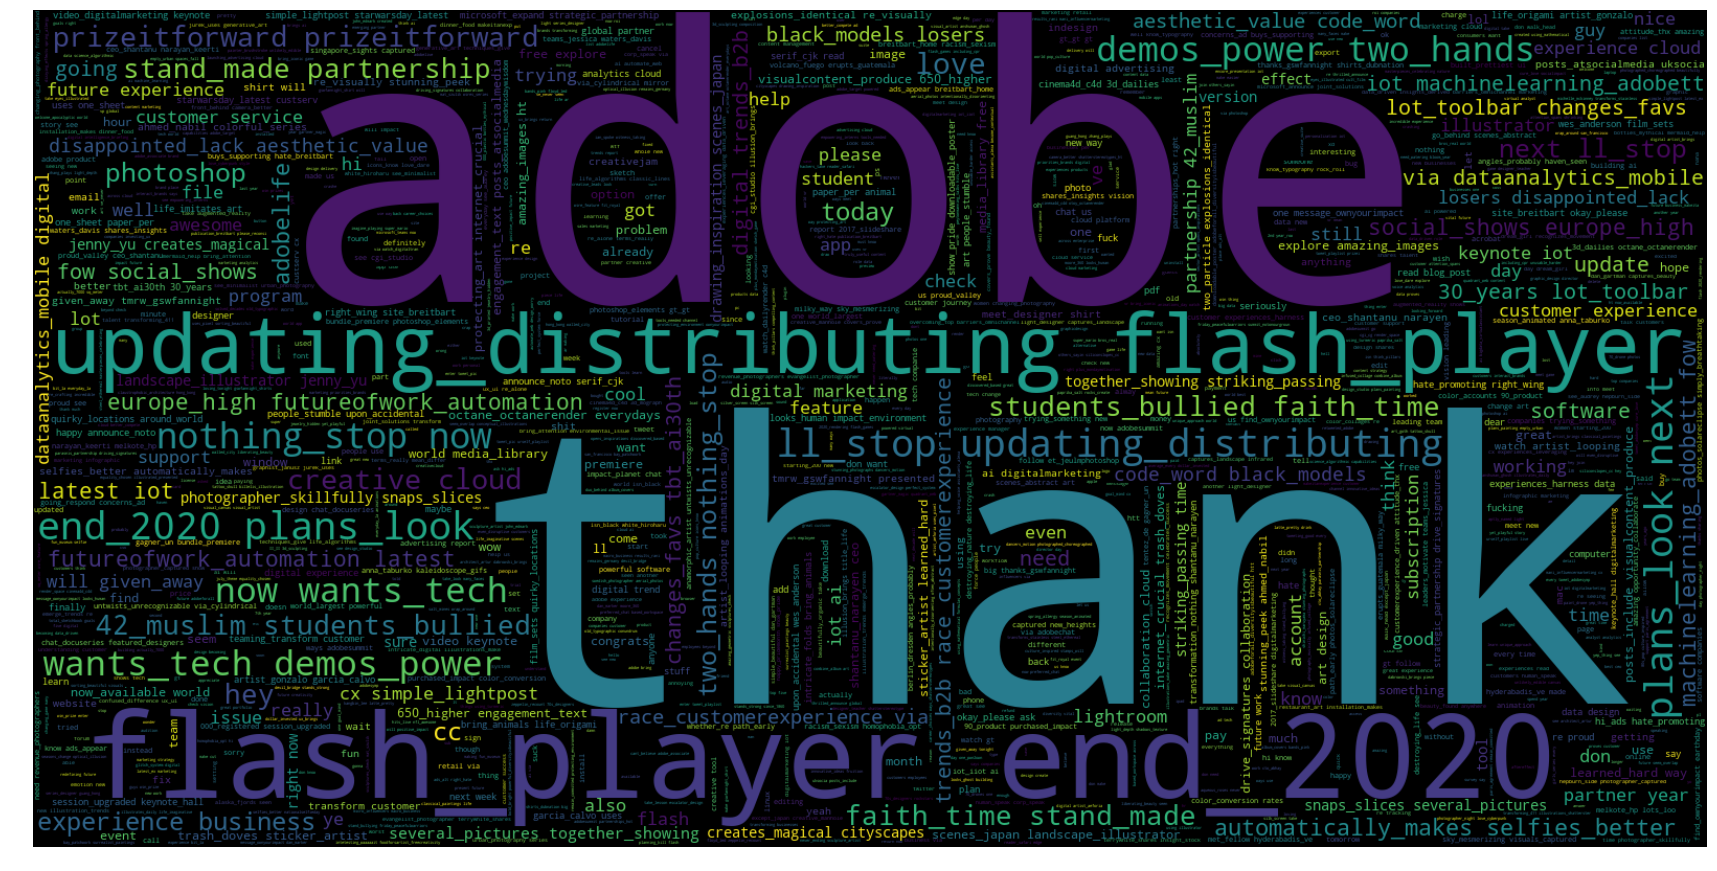

airliquidegroup


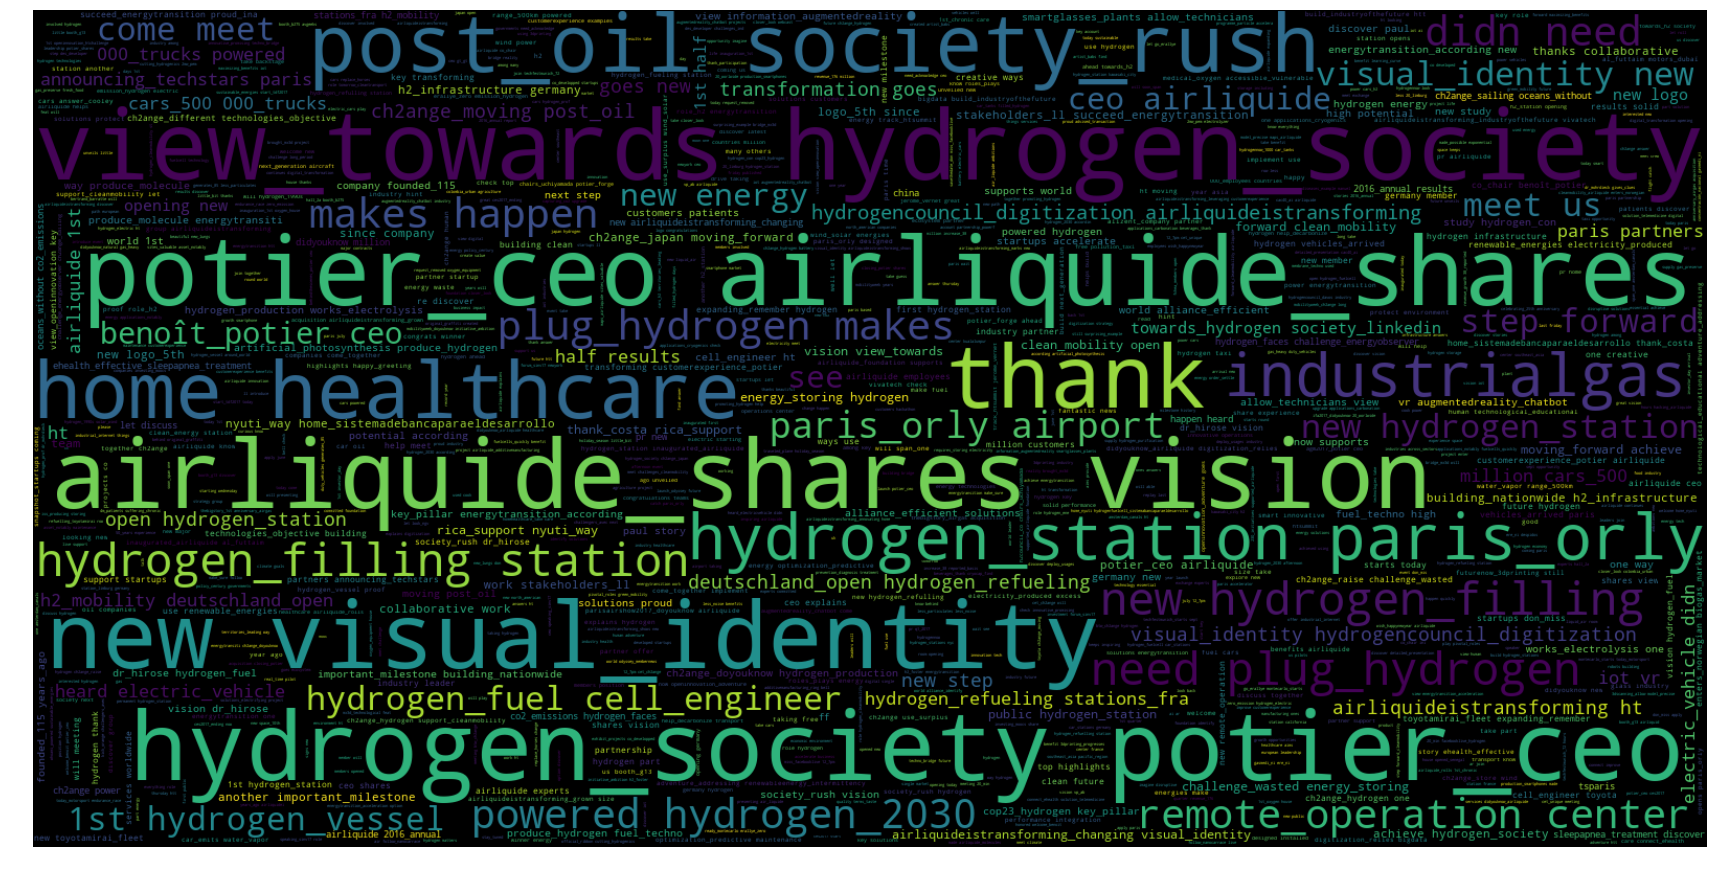

Alstom


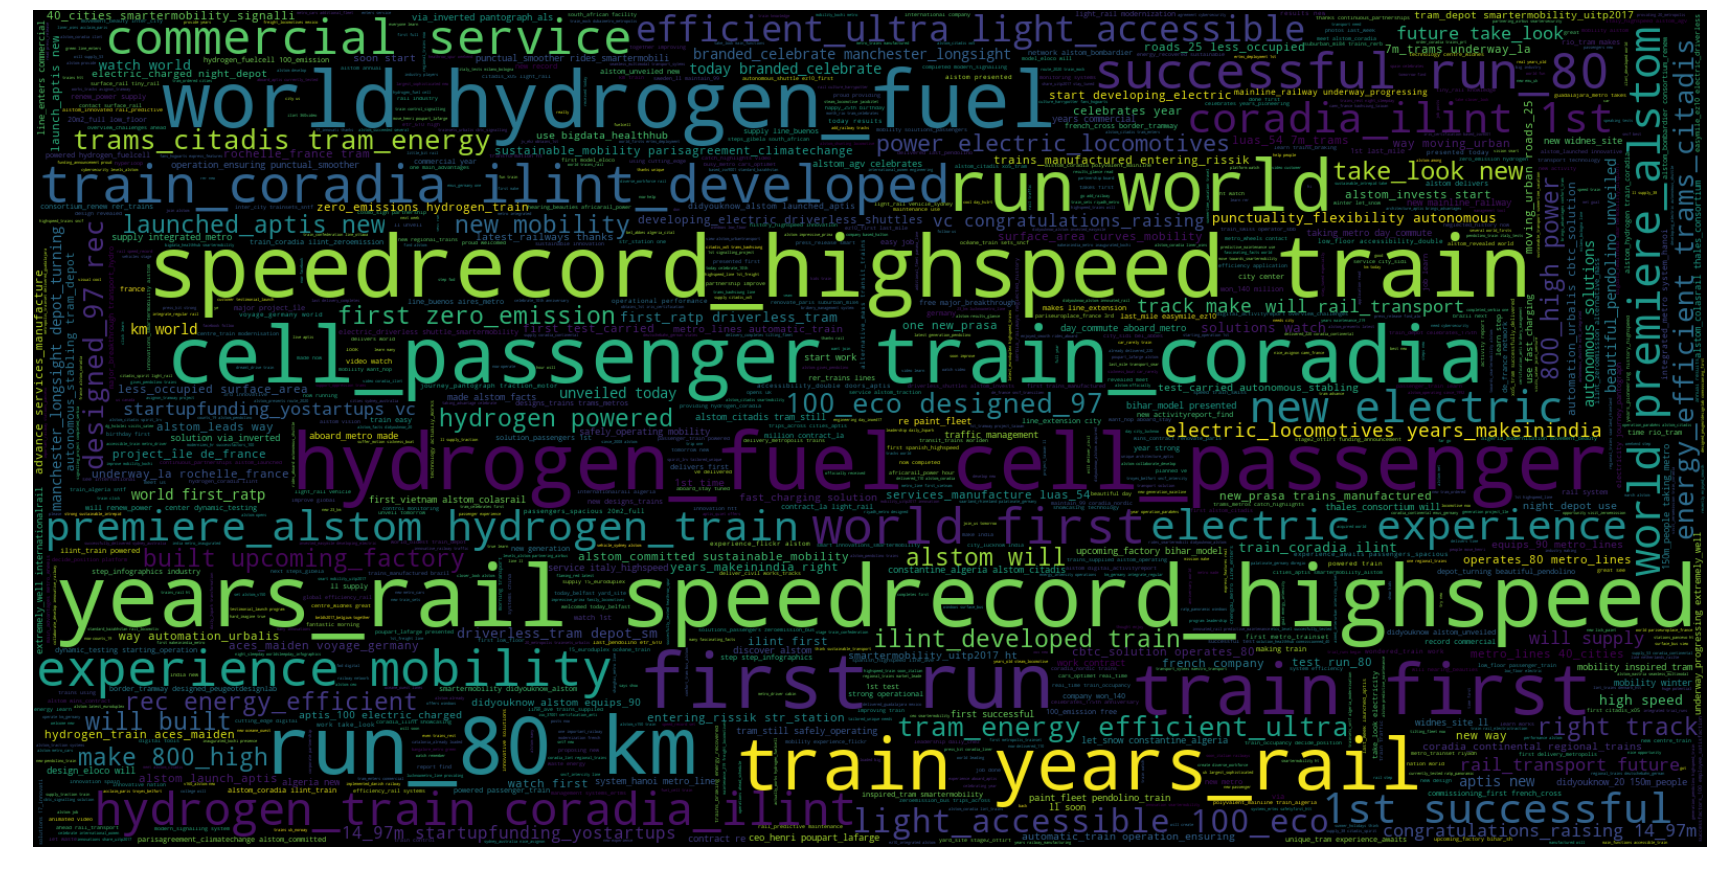

ArcelorMittal


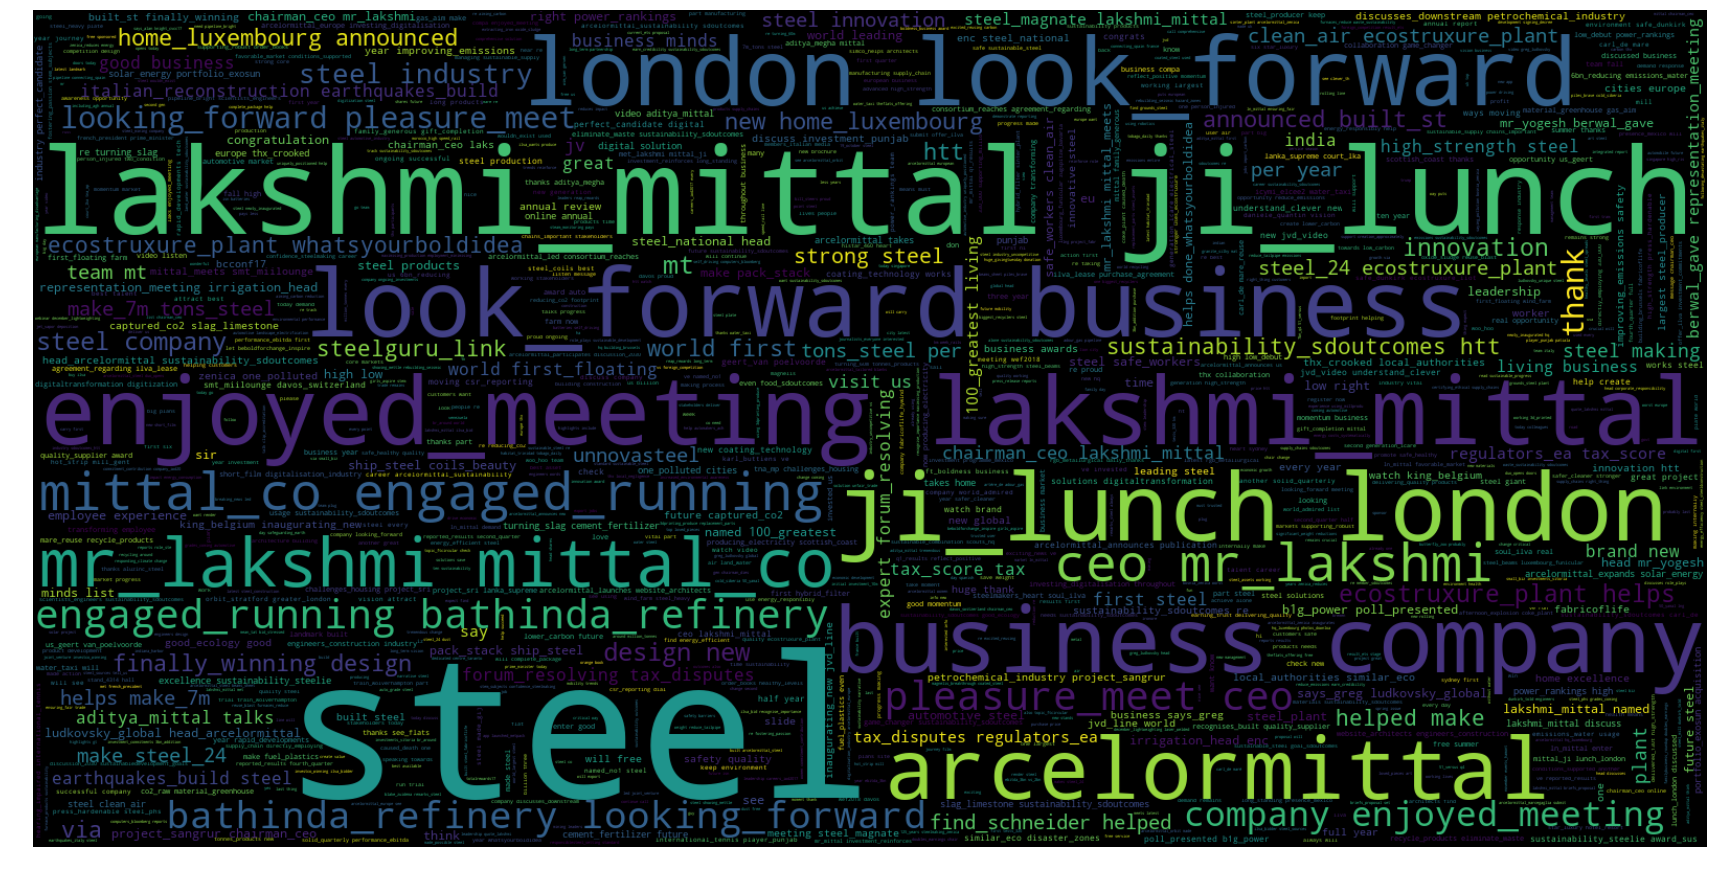

Capgemini


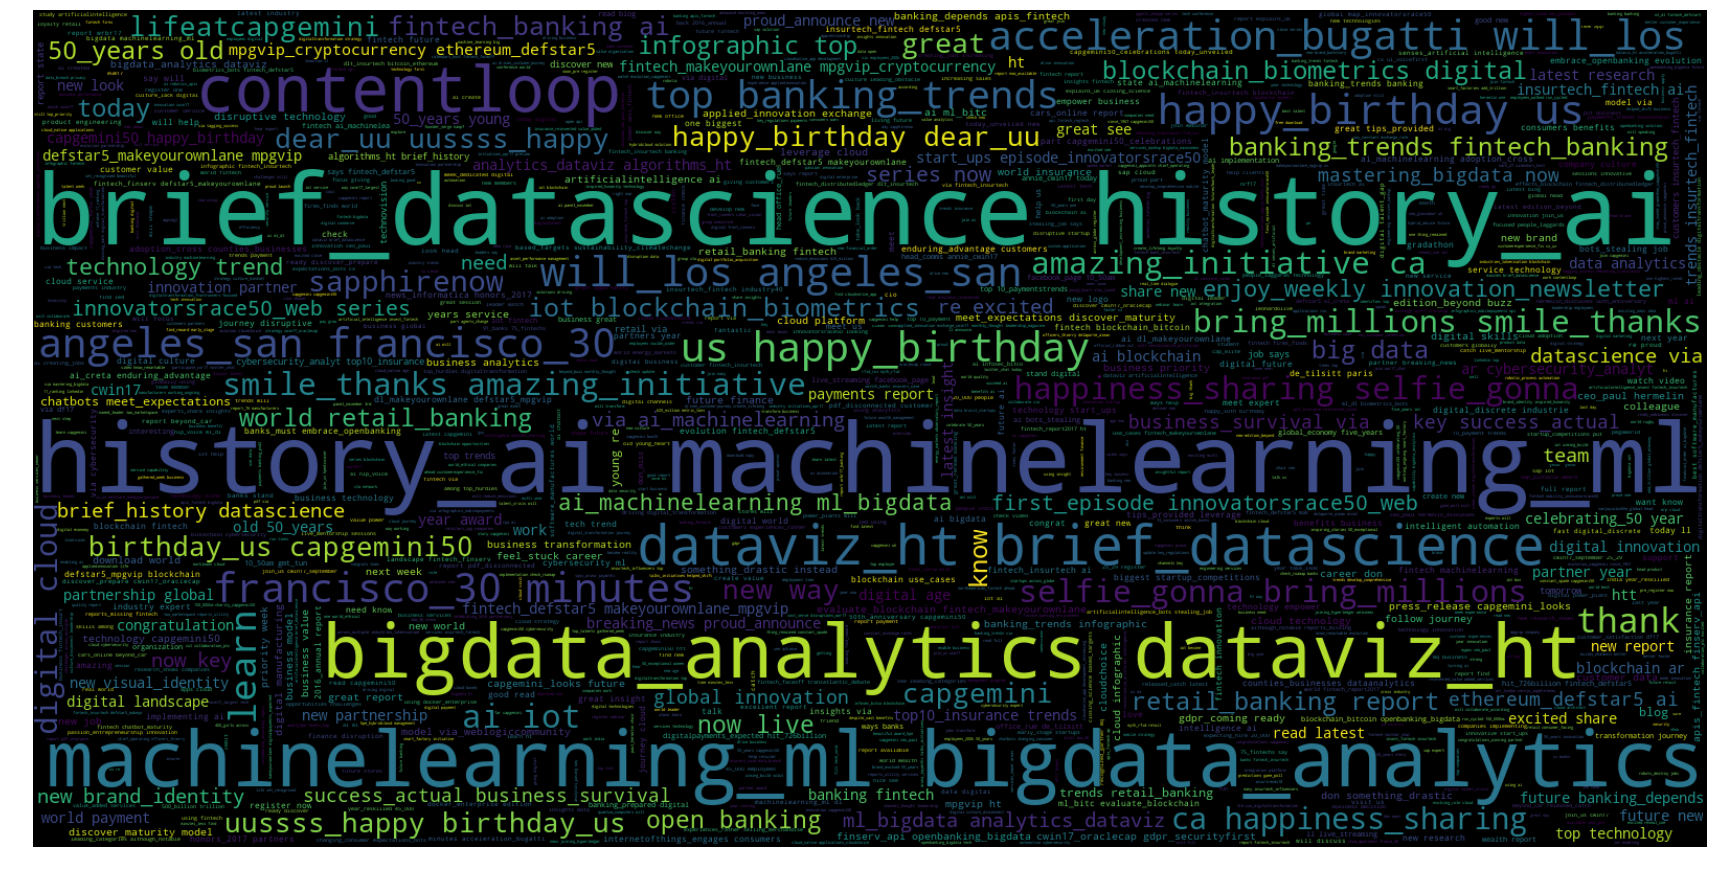

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i in range(5):
    name, _, _, _, _, _, _, tweets = data[i]
    flat_list = [ word for tweet in tweets for word in tweet ]

    if len(flat_list) > 1:
        print (name)
    
        wordcloud = WordCloud(width=1600, height=800, max_words=2000).generate(" ".join(flat_list))

        plt.figure(figsize=(30, 30))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

save to disk

In [7]:
for company in data:
    name, _, _, _, _, _, _, tweets = company
    flat_list = [ word for tweet in tweets for word in tweet ]

    if len(flat_list) > 1:
        wordcloud = WordCloud(width=1600, height=800, max_words=2000).generate(" ".join(flat_list))

        image = wordcloud.to_image()
        image.save("../results/wordcloud_" + name + ".png")

### save 100 most frequent words to csv file

build frequency dictionaries

In [8]:
import collections

companies = []
frequency_dict = []
for company in data:
    name, _, _, _, _, _, _, tweets = company

    # isolate bigrams
    bigrams = Preprocessing.mark_bigrams(tweets)

    # get frequency dictionary
    flat_text = [ word.lower() for tweet in bigrams for word in tweet ]
    frequ = collections.Counter(flat_text).most_common()

    if len(frequ) > 100:
        companies.append(name.upper())
        frequency_dict.append(frequ[:100])

export to csv

In [9]:
import csv

rows = np.array(list(frequency_dict)).T[0]

with open("../results/frequency_top_100.csv", 'w') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerow(companies)
    for row in rows:
        wr.writerow(row)